# 3章 分類問題 - 機械学習アルゴリズムscikit-learnの活用

2018/05/02



In [53]:
from sklearn import datasets

import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## 3.2.1 scikit-learn を使ったパーセプトロンのトレーニング

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, [2, 3]]

In [4]:
y = iris.target

In [5]:
print("Class labels: {}".format(np.unique(y)))

Class labels: [0 1 2]


In [12]:
from sklearn.cross_validation import train_test_split

# トレーニングデータとテストデータに分割
# 全体の30%をテストデータとする

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

In [14]:
len(X_train), len(X_test), len(X_test) / len(X)

(105, 45, 0.3)

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#　トレーニングデータの平均と標準偏差を計算

sc.fit(X_train)

# 平均、標準偏差を用いて標準化

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:
# X_train_std, X_test_std

In [28]:
from sklearn.linear_model import Perceptron

"""
エポック数40、学習率0．1でパーセプトロンのインスタンスを生成
"""
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0, shuffle=True)


"""
トレーニングデータに適合させる
"""
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

### memo: そのままの写経だと DeprecationWarning でるのでドキュメントを確認する

- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [32]:
"""
テストデータで予測を実施
"""
y_pred = ppn.predict(X_test_std)

"""
誤分類のサンプルの個数を表示
"""
print("length: {}\nMisclassified samples: {}".format(len(y_test), (y_test != y_pred).sum()))


length: 45
Misclassified samples: 4


### 決定領域のプロット

In [63]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_reqions(X, y, classifier, test_idx=None, resolusion=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1 , X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolusion),
        np.arange(x2_min, x2_max, resolusion)
    )
    
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contour(xx1, xx2, z, alpha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    
    # クラス毎にサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl
        )
        
    # テストサンプルを目立たせる
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidths=1, marker="o", s=55, label='test set')

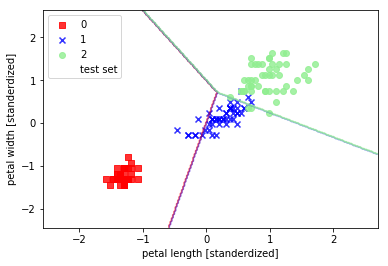

In [64]:
""" トレーニングデータとテストデータの特徴量を行方向に結合
"""
X_combined_std = np.vstack((X_train_std, X_test_std))

""" トレーニングデータとテストデータのクラスラベルの結合
"""
y_combined = np.hstack((y_train, y_test))

""" 決定領域のプロット
"""
plot_decision_reqions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

""" 軸ラベルのプロット
"""
plt.xlabel("petal length [standerdized]")
plt.ylabel("petal width [standerdized]")

""" 凡例の設定
"""
plt.legend(loc='upper left')

""" グラフの表示
"""
plt.show()